When I see a rainbow, I perceive the luminance inside the arc to be brighter than outside the arc. Is this effect percpetual (inside our head) or physical (inside each droplet in the sky). So, this is a simple notebook to show off how to synthesize the image of a rainbow on a realistic sky. TL;DR: there must be a physical reason for it.

Outline: The rainbow is a set of colors over a gradient of hues, masked for certain ones. The sky will be a gradient over blueish colors.

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
FIG_WIDTH = 15
FIGSIZE=(FIG_WIDTH, .618 * FIG_WIDTH)

Size of the images that we will generate, definition of the meshgrid:

In [2]:
N_pix = 1024
ruler = np.linspace(-1, 1, N_pix, endpoint=True)
X, Y = np.meshgrid(ruler, ruler)
print('X.shape =', X.shape)

X.shape = (1024, 1024)


Creation of a band:

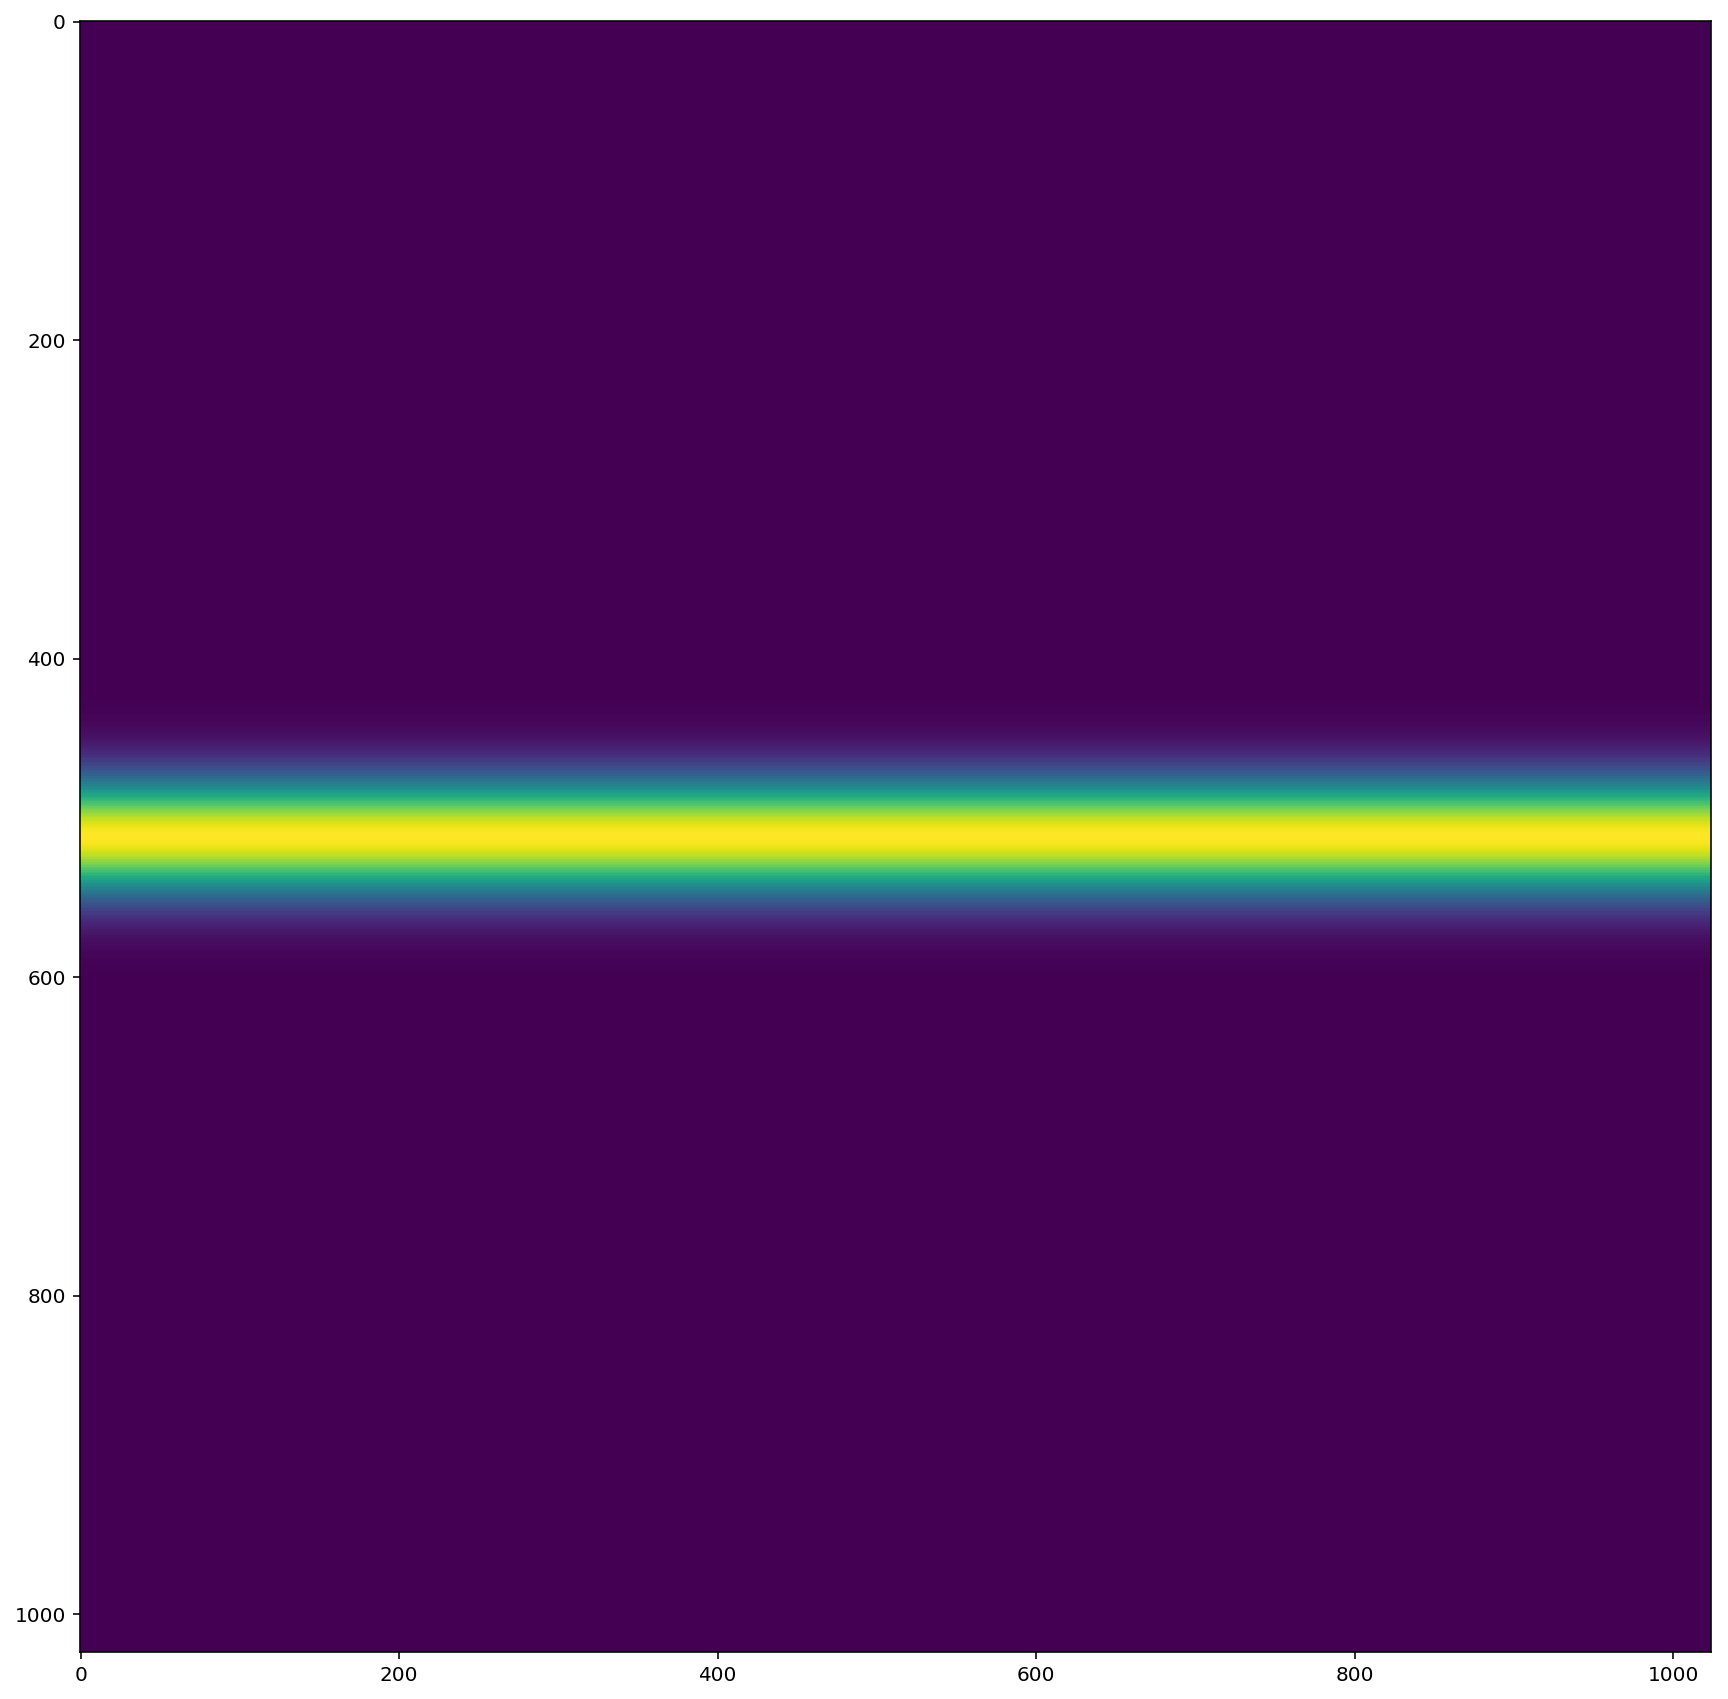

In [3]:
width, X0, Y0 = .05, .0, 0.
blue2red = np.exp( -.5 * ((Y-Y0)**2)/width**2)
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(blue2red, vmin=0, vmax=1);

Creation of a softmax band from zero to one:

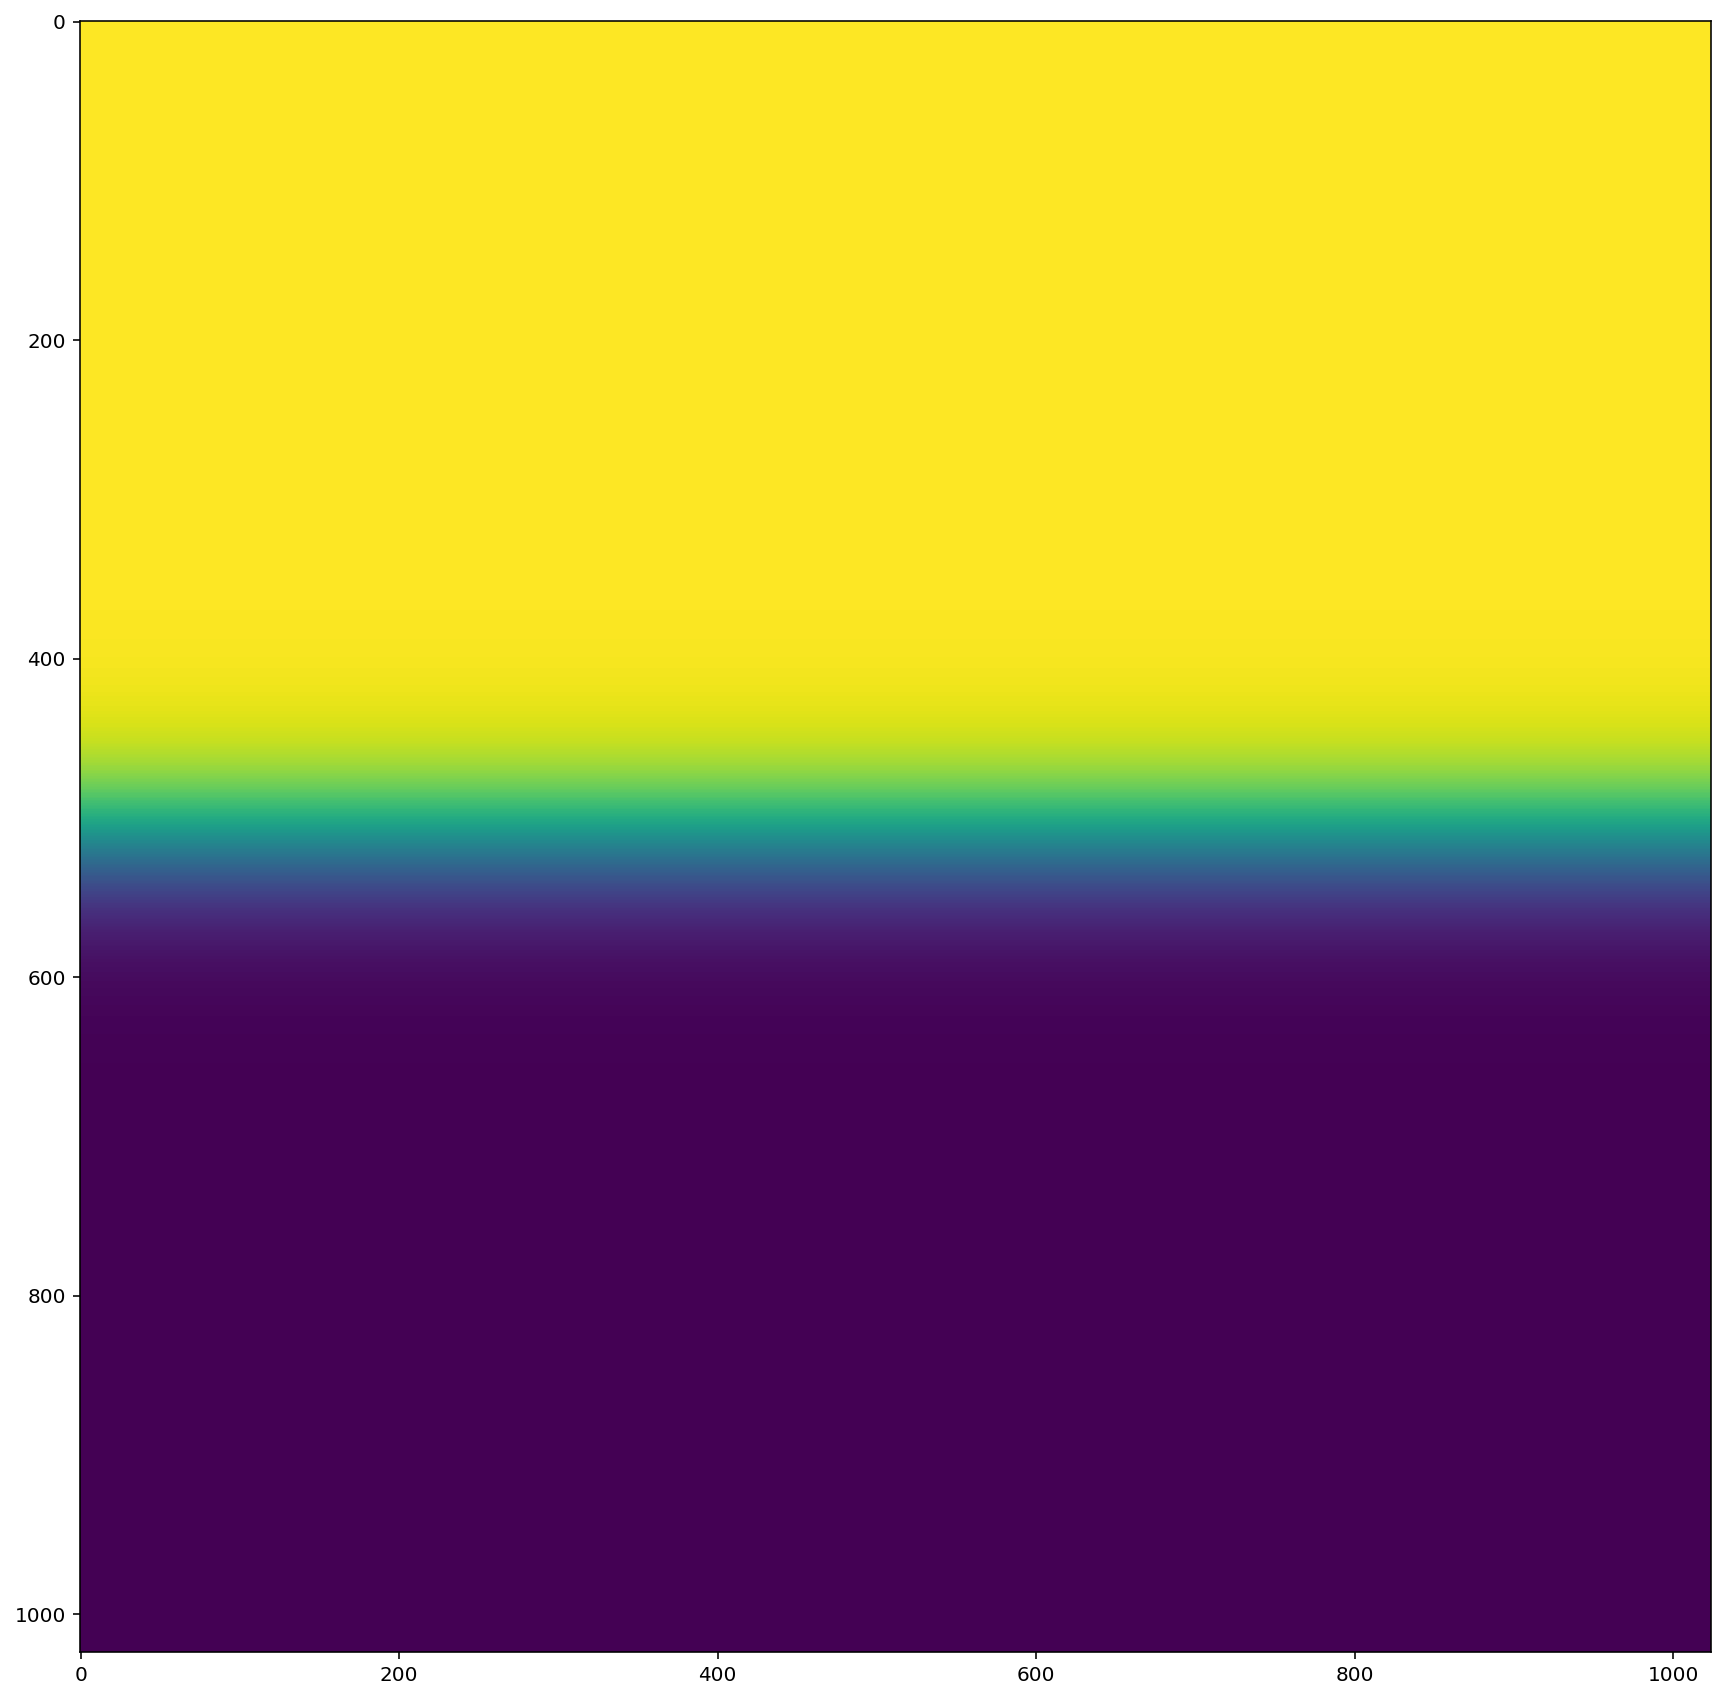

In [4]:
blue2red = 1 / (1 + np.exp( (Y-Y0)/width) ) 
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(blue2red, vmin=0, vmax=1);

Bending the band around a parabola:

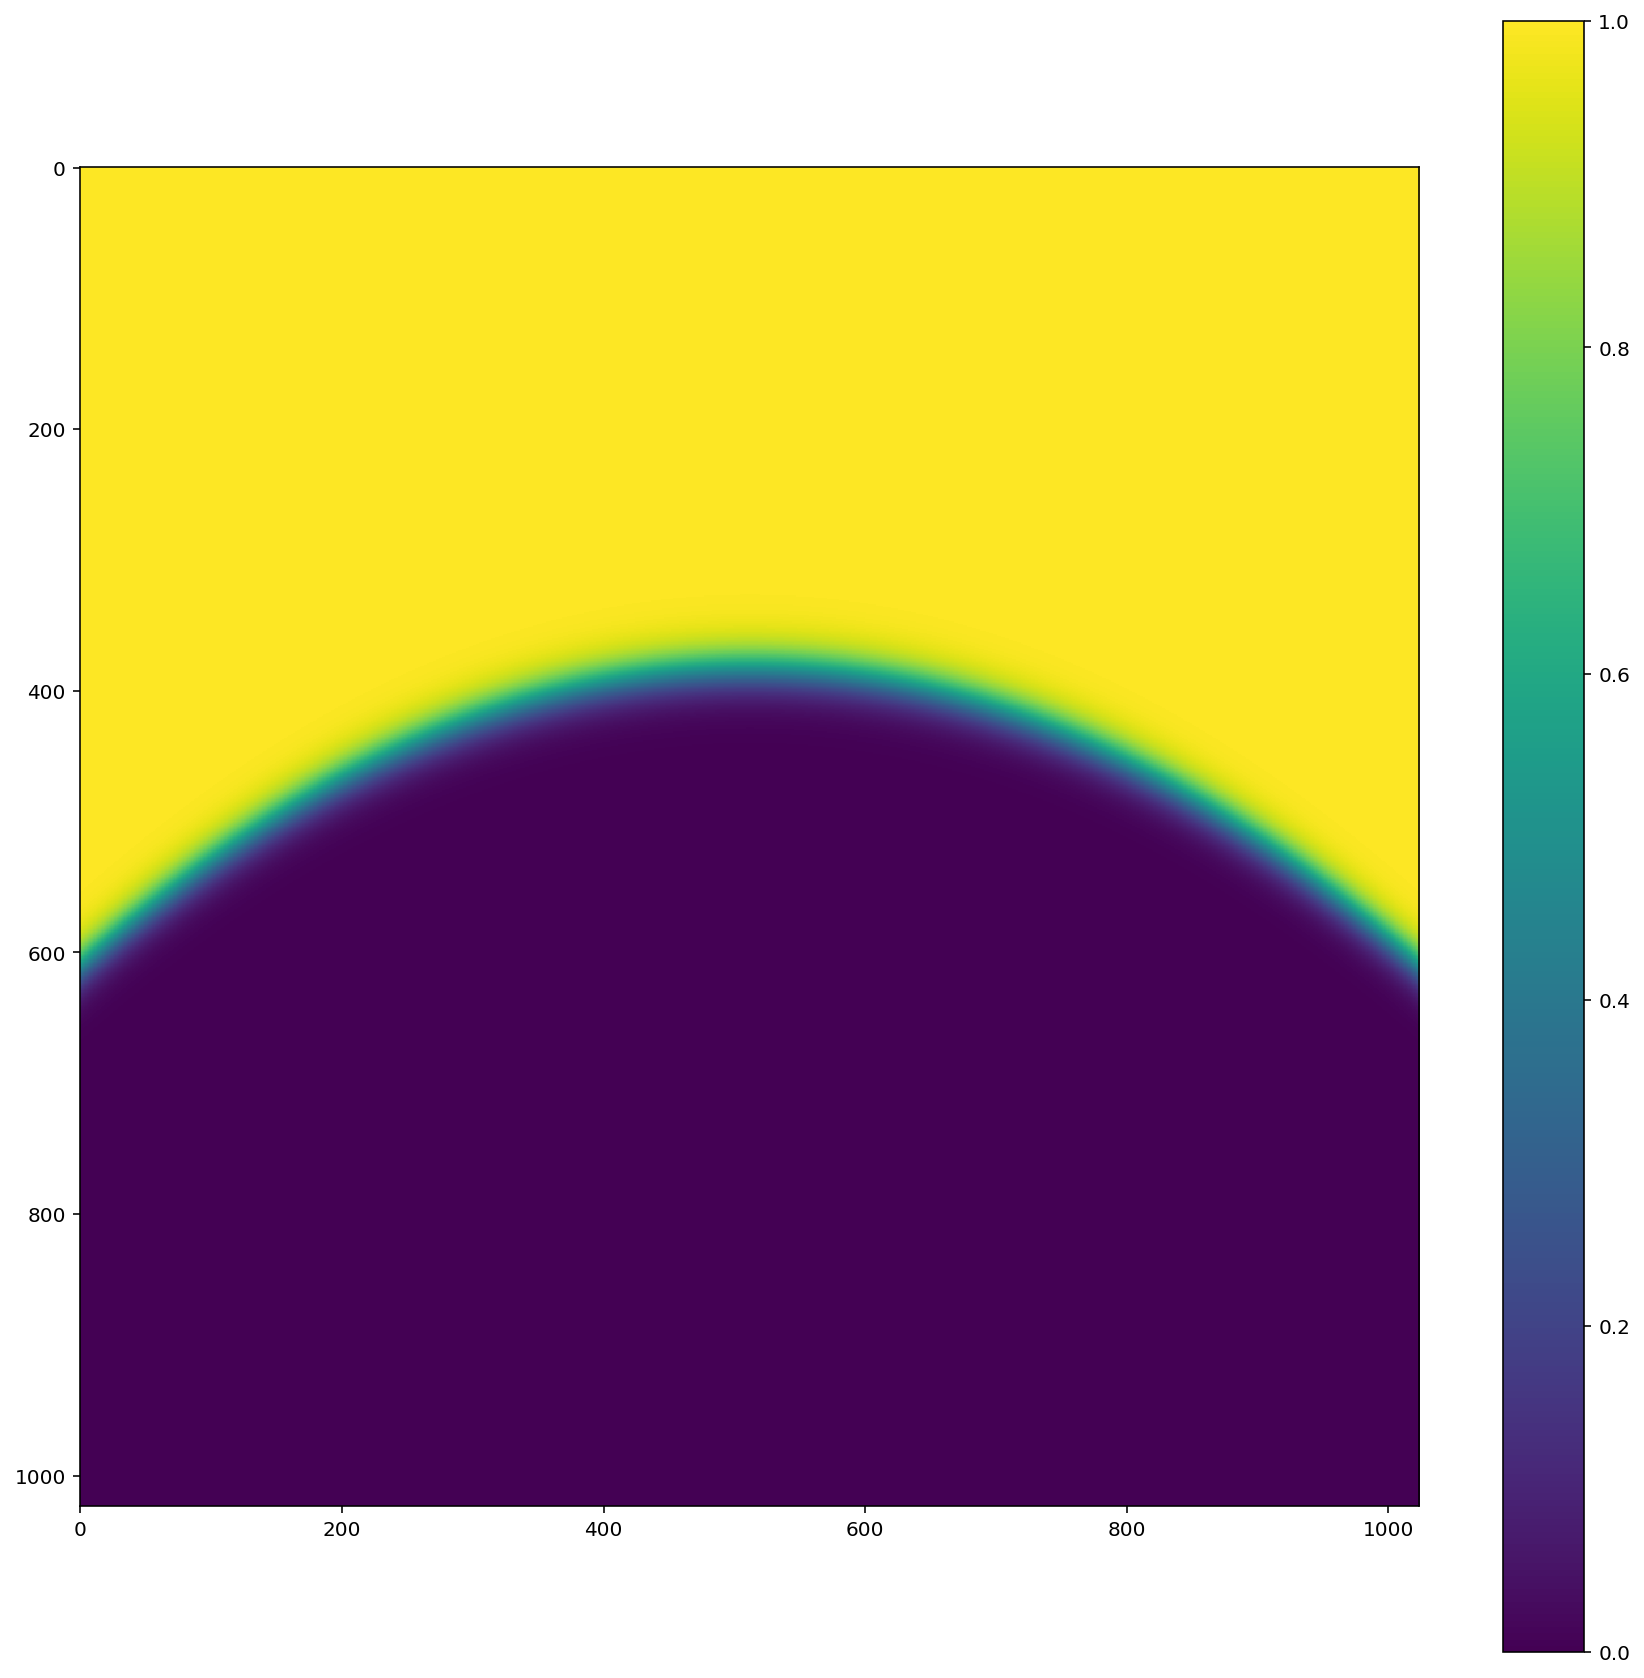

In [5]:
width, X0, Y0, radius = .02, .0, -.25, 1.5
blue2red = 1 / (1 + np.exp( (- (X-X0)**2/radius**2 + Y-Y0)/width) ) 
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
cmap = ax.imshow(blue2red, vmin=0, vmax=1)
fig.colorbar(mappable=cmap);

Converting to a RGB image:

In [6]:
from matplotlib.colors import hsv_to_rgb
help(hsv_to_rgb)

Help on function hsv_to_rgb in module matplotlib.colors:

hsv_to_rgb(hsv)
    convert hsv values in a numpy array to rgb values
    all values assumed to be in range [0, 1]
    
    Parameters
    ----------
    hsv : (..., 3) array-like
       All values assumed to be in range [0, 1]
    
    Returns
    -------
    rgb : (..., 3) ndarray
       Colors converted to RGB values in range [0, 1]



Empirically defining the starting and ending hues in a rainbow:

hue.min() 0.0 , hue.max() 0.8
hsv.shape = (1024, 1024, 3)
rainbow.min() 0.0 , rainbow.max() 1.0
rainbow.shape = (1024, 1024, 3)


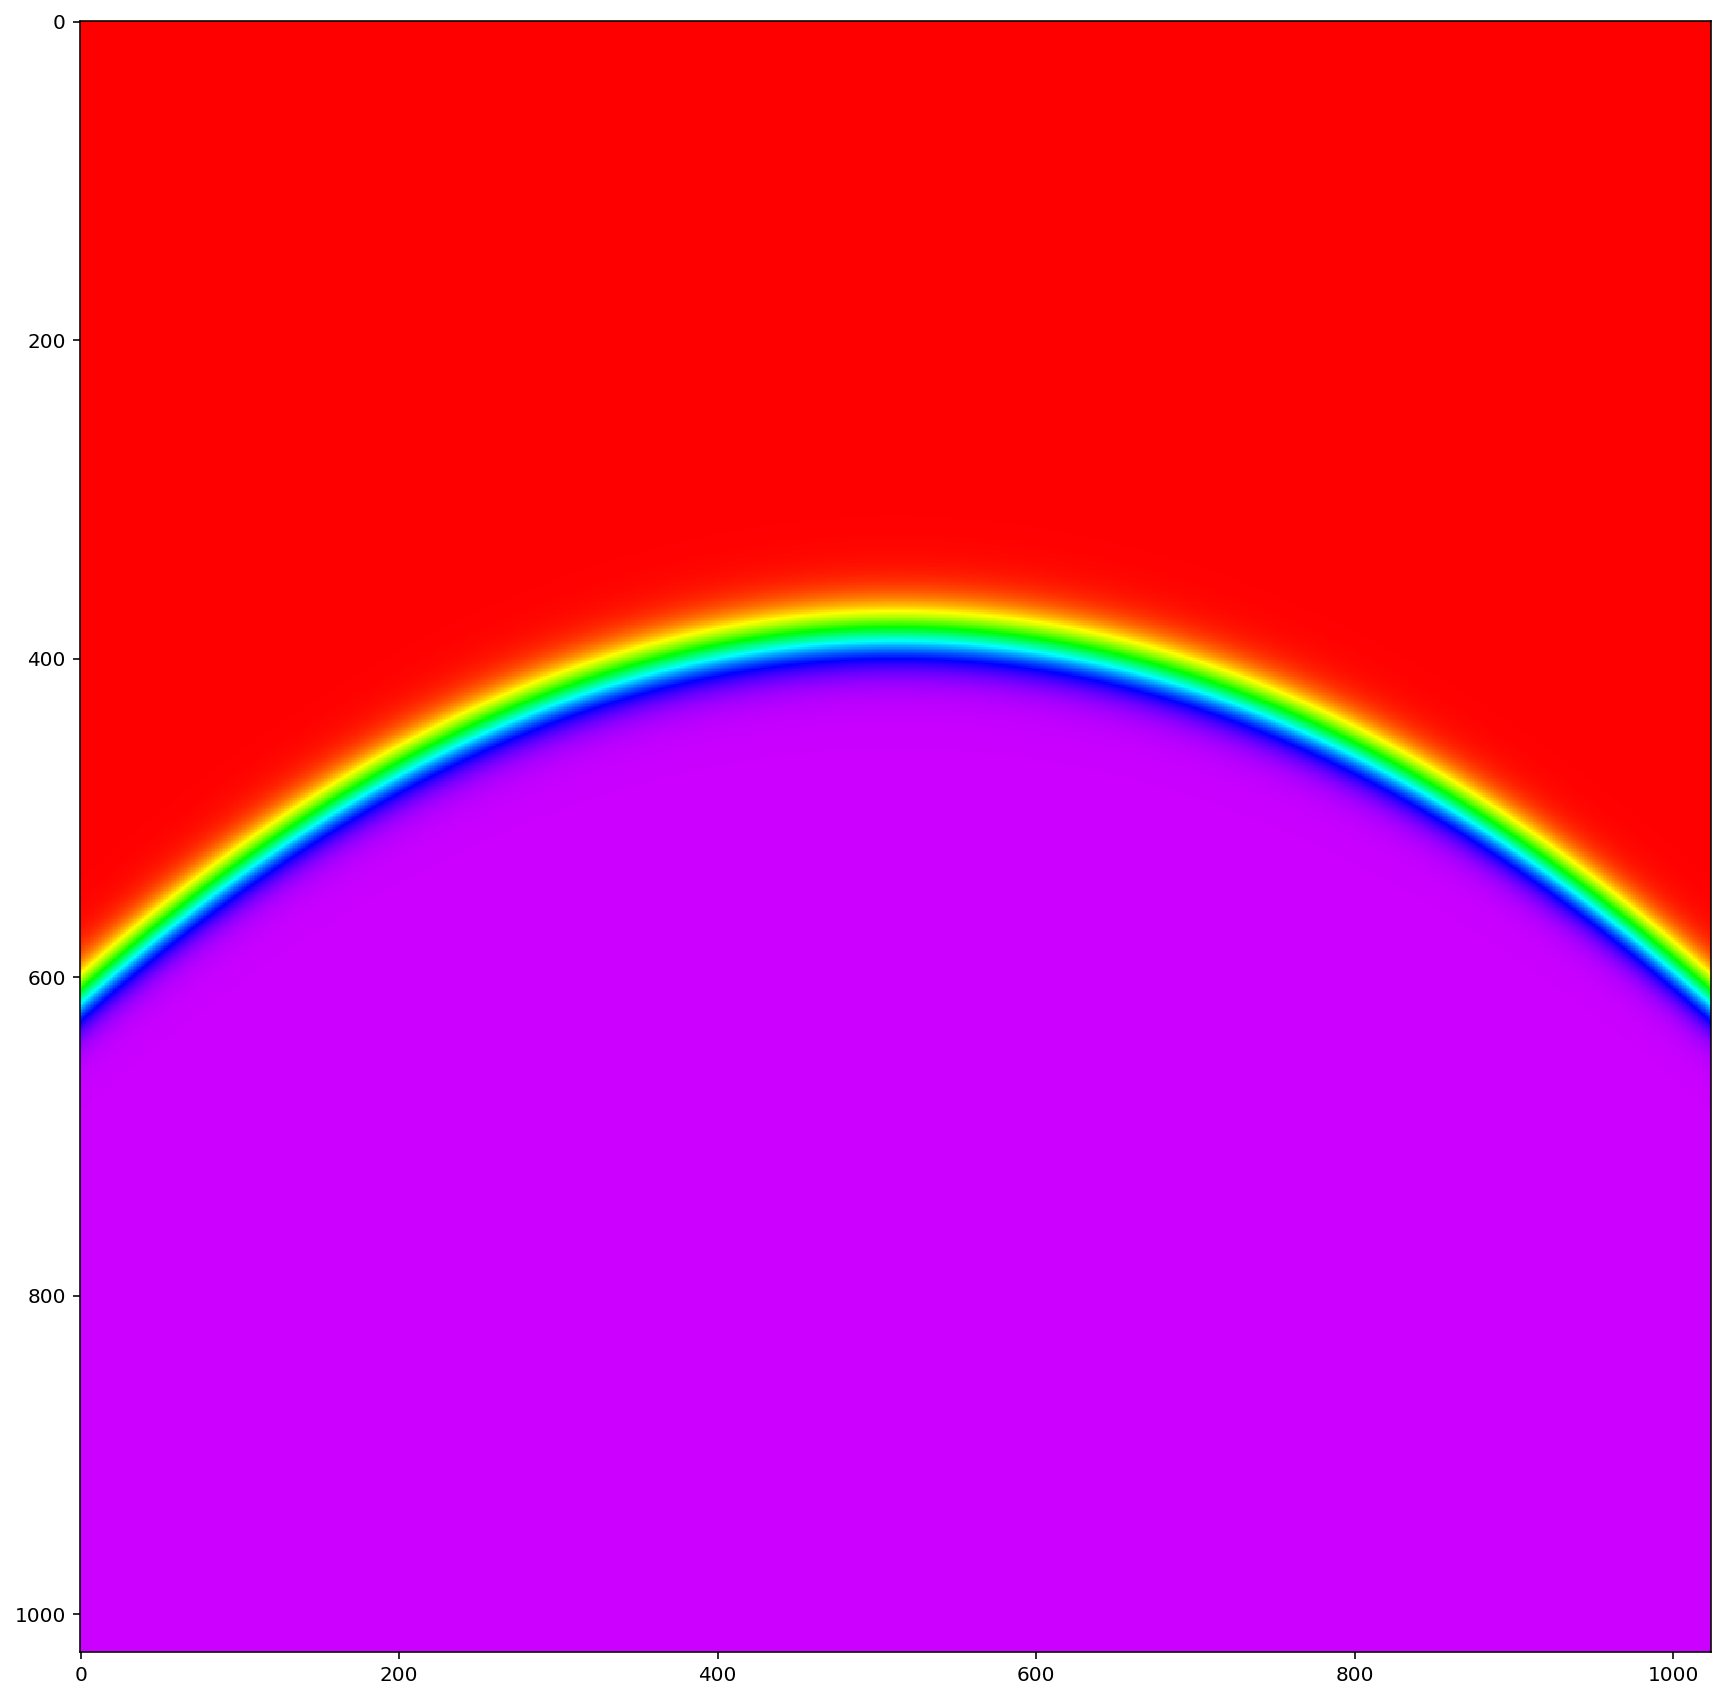

In [7]:
h_start, h_stop = .8, .0
hue = h_start+(h_stop-h_start)*blue2red
print('hue.min()', hue.min(), ', hue.max()', hue.max())
hsv = np.dstack((hue, np.ones_like(hue), np.ones_like(hue)))
print('hsv.shape =', hsv.shape)
rainbow = hsv_to_rgb(hsv)
print('rainbow.min()', rainbow.min(), ', rainbow.max()', rainbow.max())
print('rainbow.shape =', rainbow.shape)
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(rainbow, vmin=0, vmax=1)

Creating a simple mask:

hsv.shape = (1024, 1024, 3)
rainbow.shape = (1024, 1024, 3)


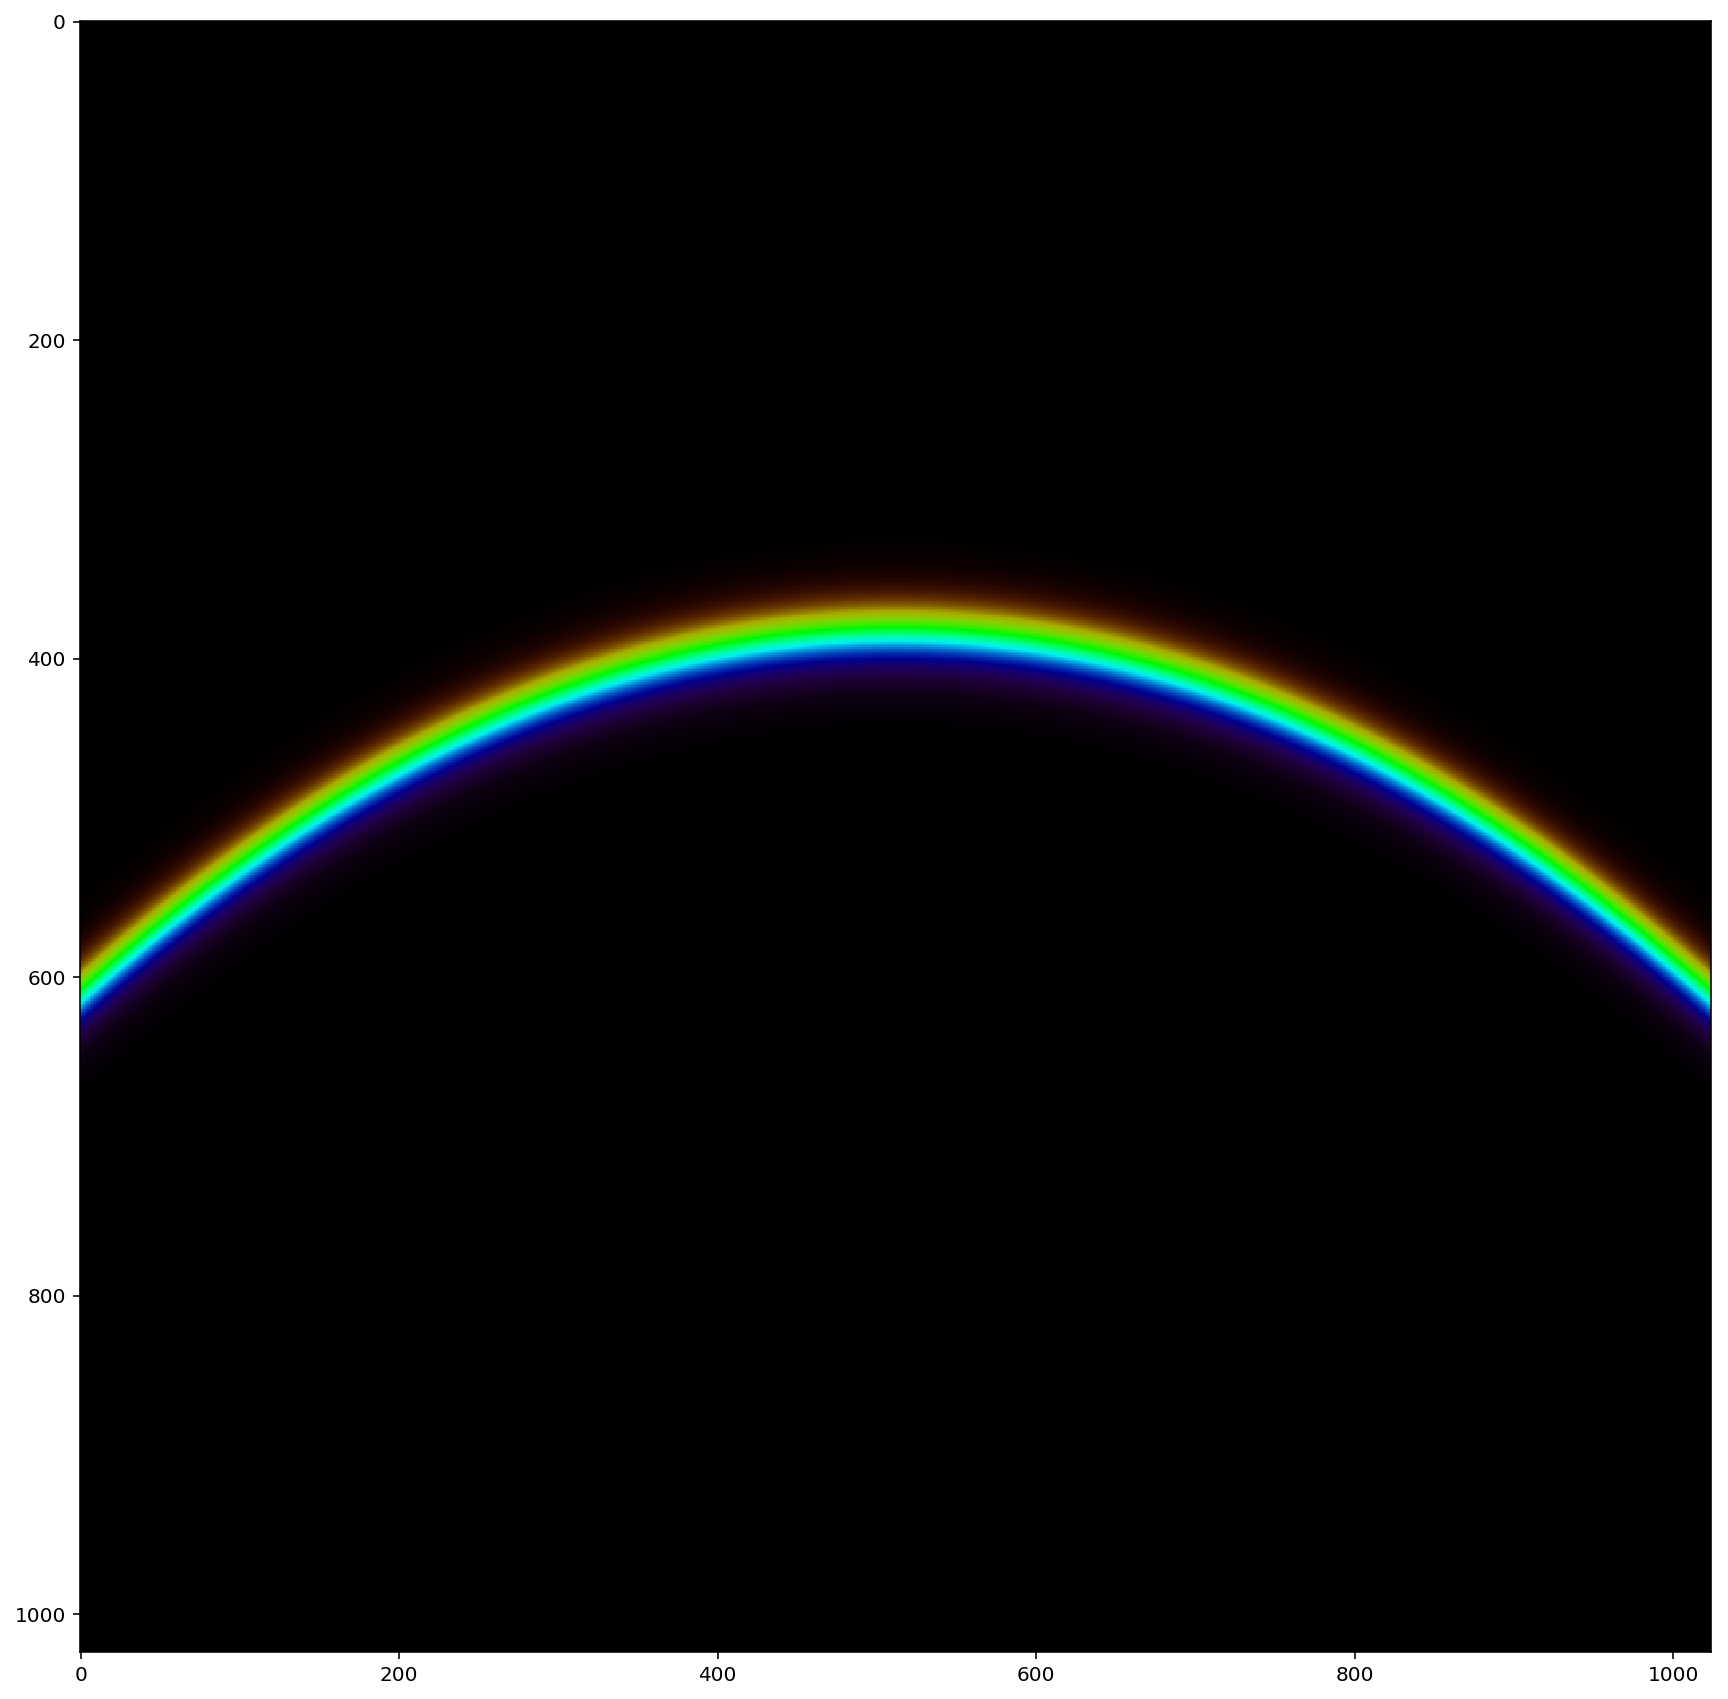

In [8]:
mask = blue2red * (1-blue2red)
mask /= mask.max()
hsv = np.dstack((hue, np.ones_like(hue), mask))
print('hsv.shape =', hsv.shape)
from matplotlib.colors import hsv_to_rgb
rainbow = hsv_to_rgb(hsv)
print('rainbow.shape =', rainbow.shape)
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(rainbow, vmin=0, vmax=1);

Now assembling this image to that of a background sky:

image.shape = (1024, 1024, 3)
image.min() 0.15000000000000002 , image.max() 0.8


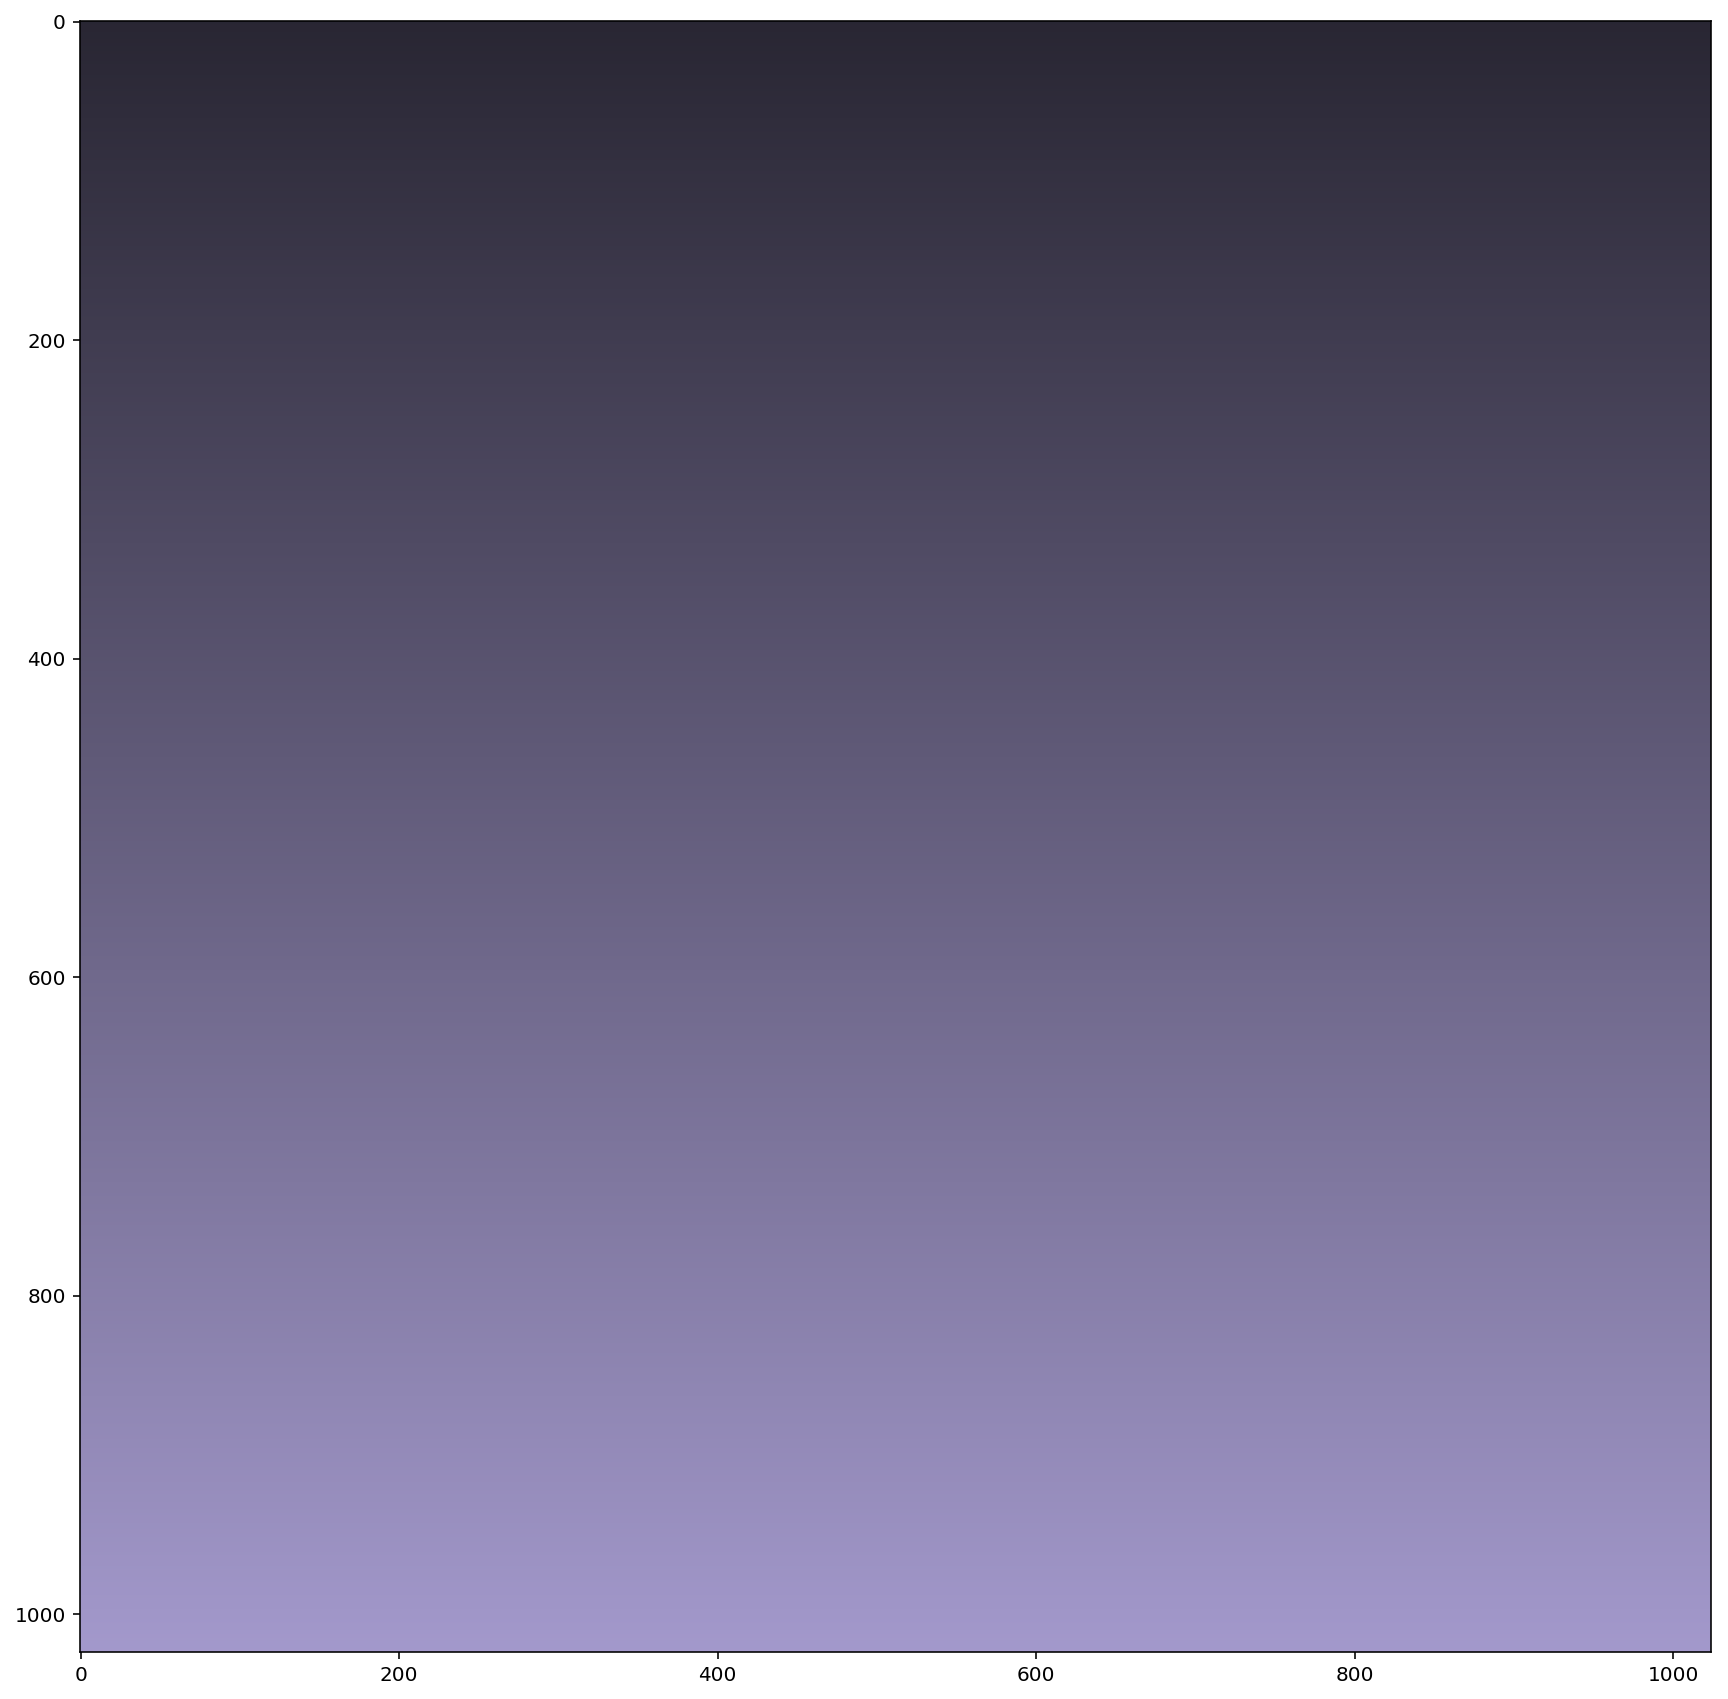

In [9]:
L_mean = .7
sky_contrast = .6
blue = np.array([0.1+L_mean, 0.05+L_mean, 1.])
image = (.5 + .5 * sky_contrast * Y)[:, :, None] * blue[None, None, :]
print('image.shape =', image.shape)
print('image.min()', image.min(), ', image.max()', image.max())

fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(image, vmin=0, vmax=1);

In [10]:
print(image.min(), image.max())

0.15000000000000002 0.8


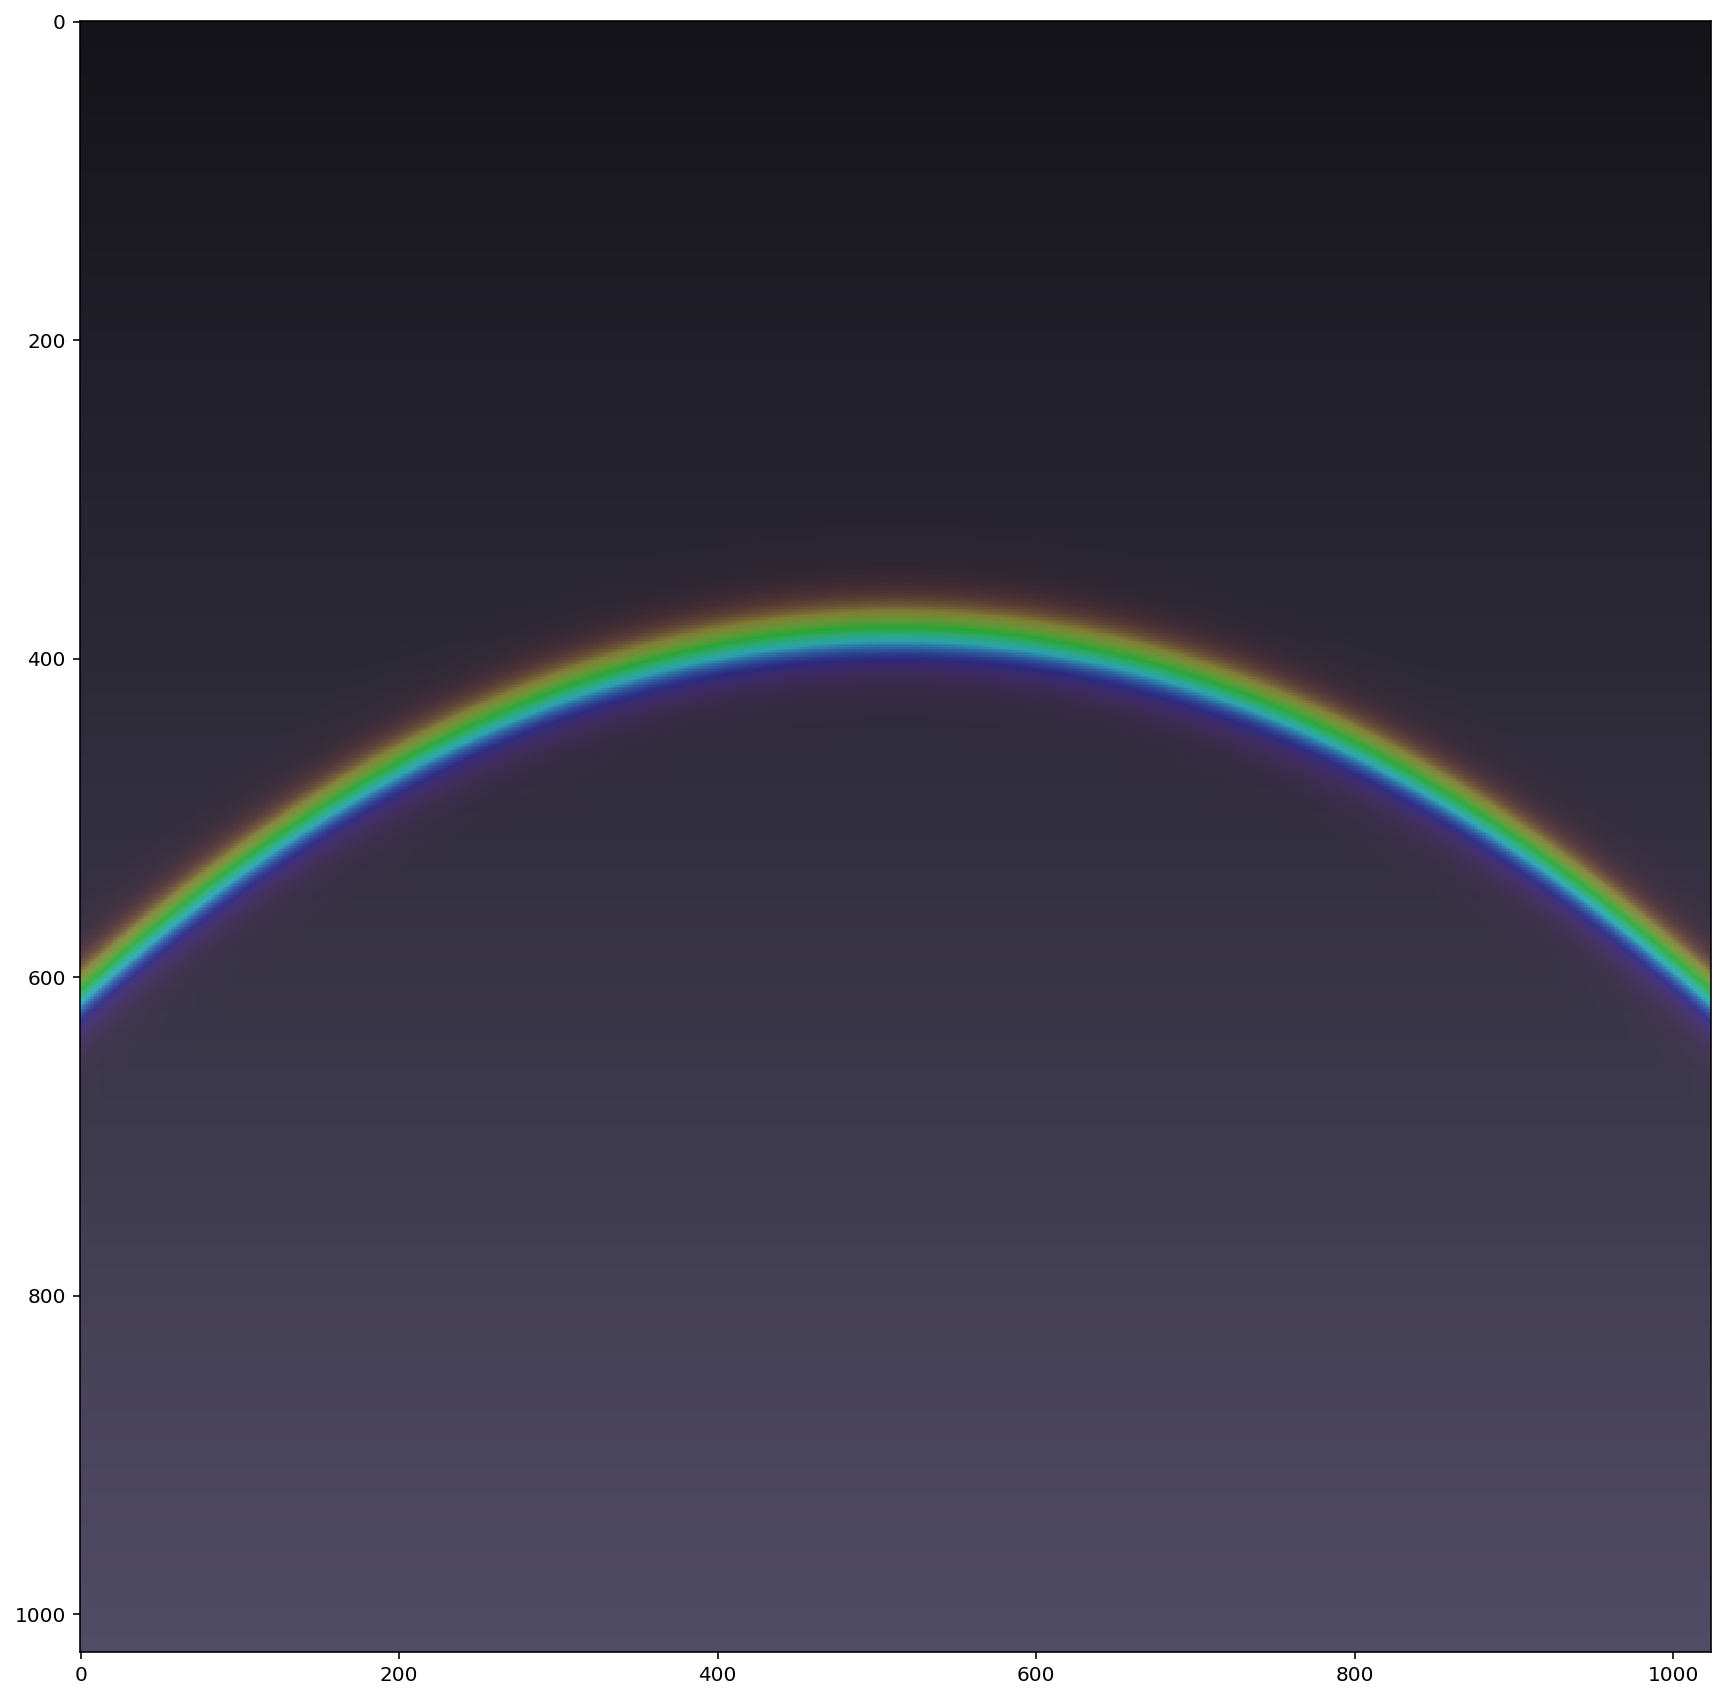

In [11]:
rainbow_contrast = .5
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow((1.-rainbow_contrast)*image+rainbow_contrast*rainbow, vmin=0, vmax=1);

Quite realistic, no? Still, there is little effect at a high contrast for the rainbow.  I do not perceive a "rainbow effect", so most likely I would predict there must be a physical reason for it.

Yet...

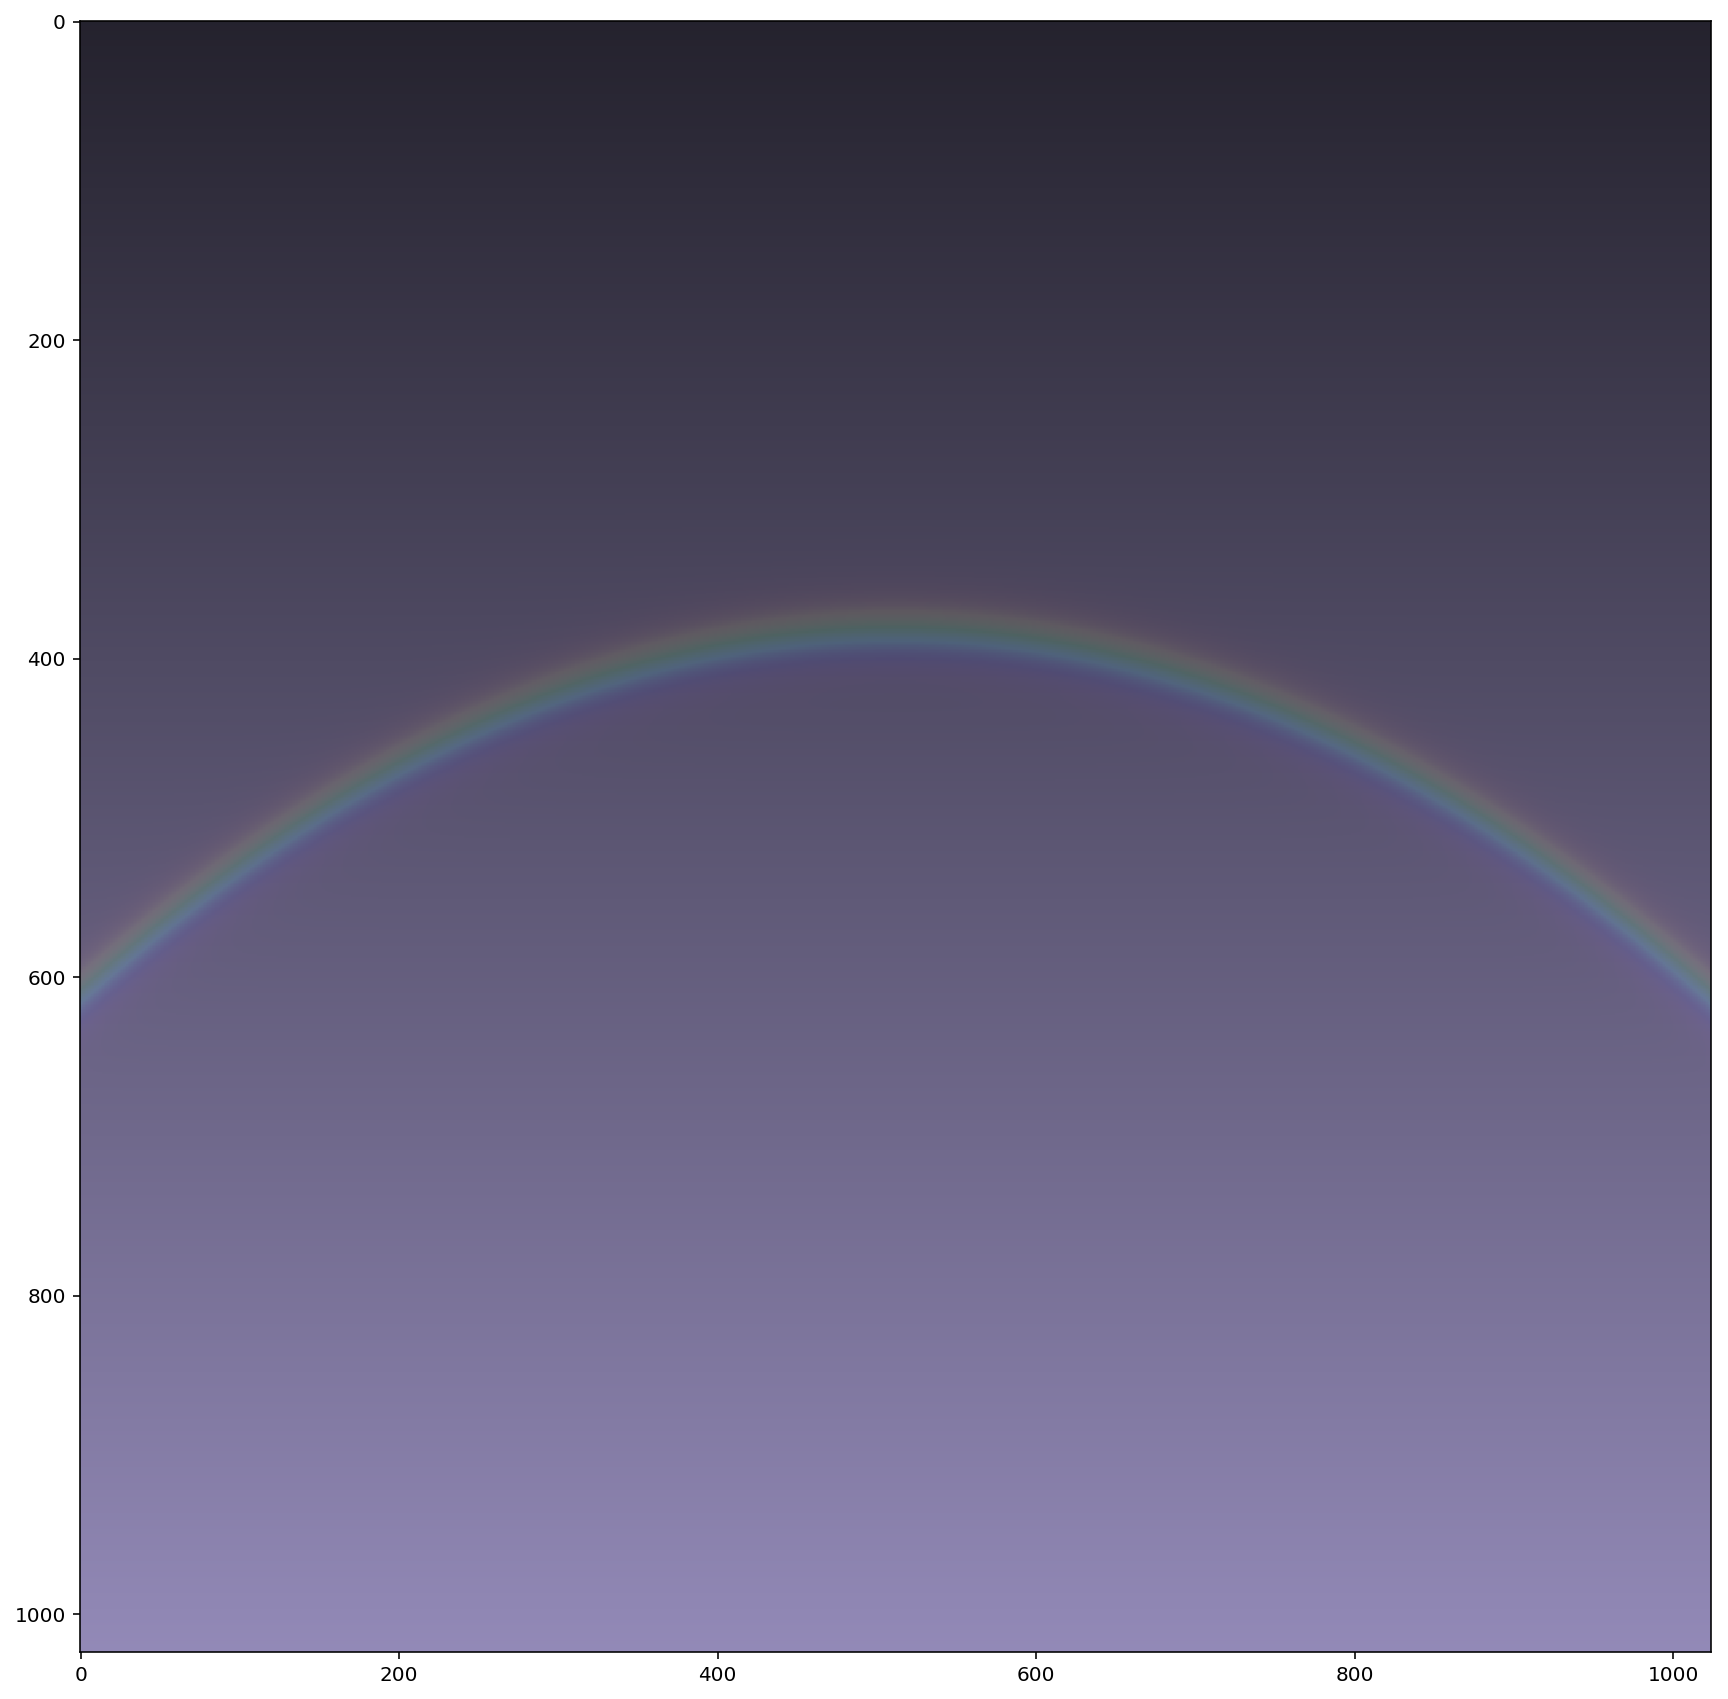

In [12]:
rainbow_contrast = .1
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow((1.-rainbow_contrast)*image+rainbow_contrast*rainbow, vmin=0, vmax=1);

There is a little effect at low contrast...



Take a picture found on the net (Hi, https://www.laniadvokat.com/blog/2018/7/24/lake-city-to-molas-pass !), with this nice double rainbow:

image.shape = (1333, 1000, 3)
image.min() 0 , image.max() 255


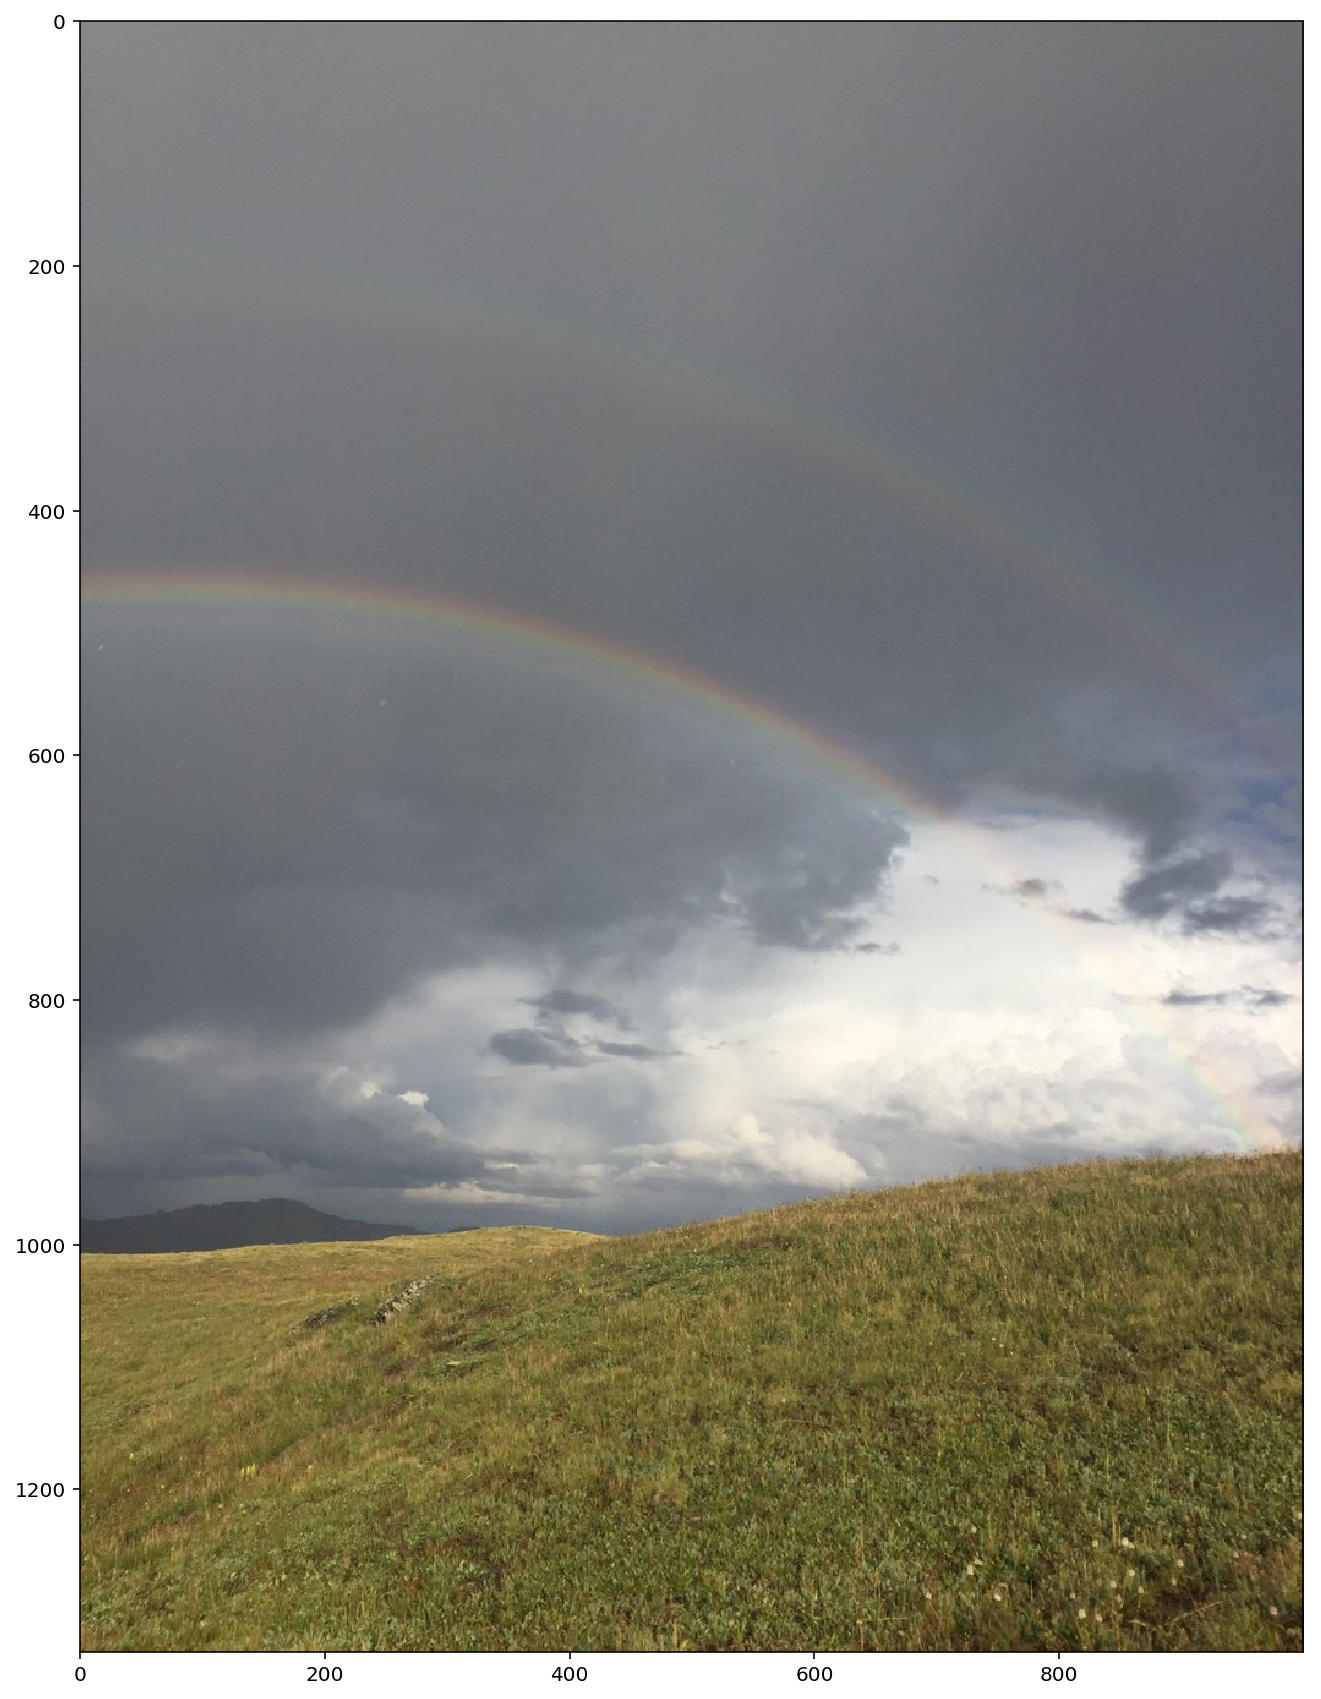

In [13]:
import imageio
image = imageio.imread('https://static1.squarespace.com/static/58efb414f7e0abff4dbfc0c4/t/5b5ff2f3aa4a99799747f7eb/1533014789574/IMG_3775.JPG')
print('image.shape =', image.shape)
print('image.min()', image.min(), ', image.max()', image.max())
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(image, vmin=0, vmax=255);

Let's zoom below and above, somewhere around the first arc:

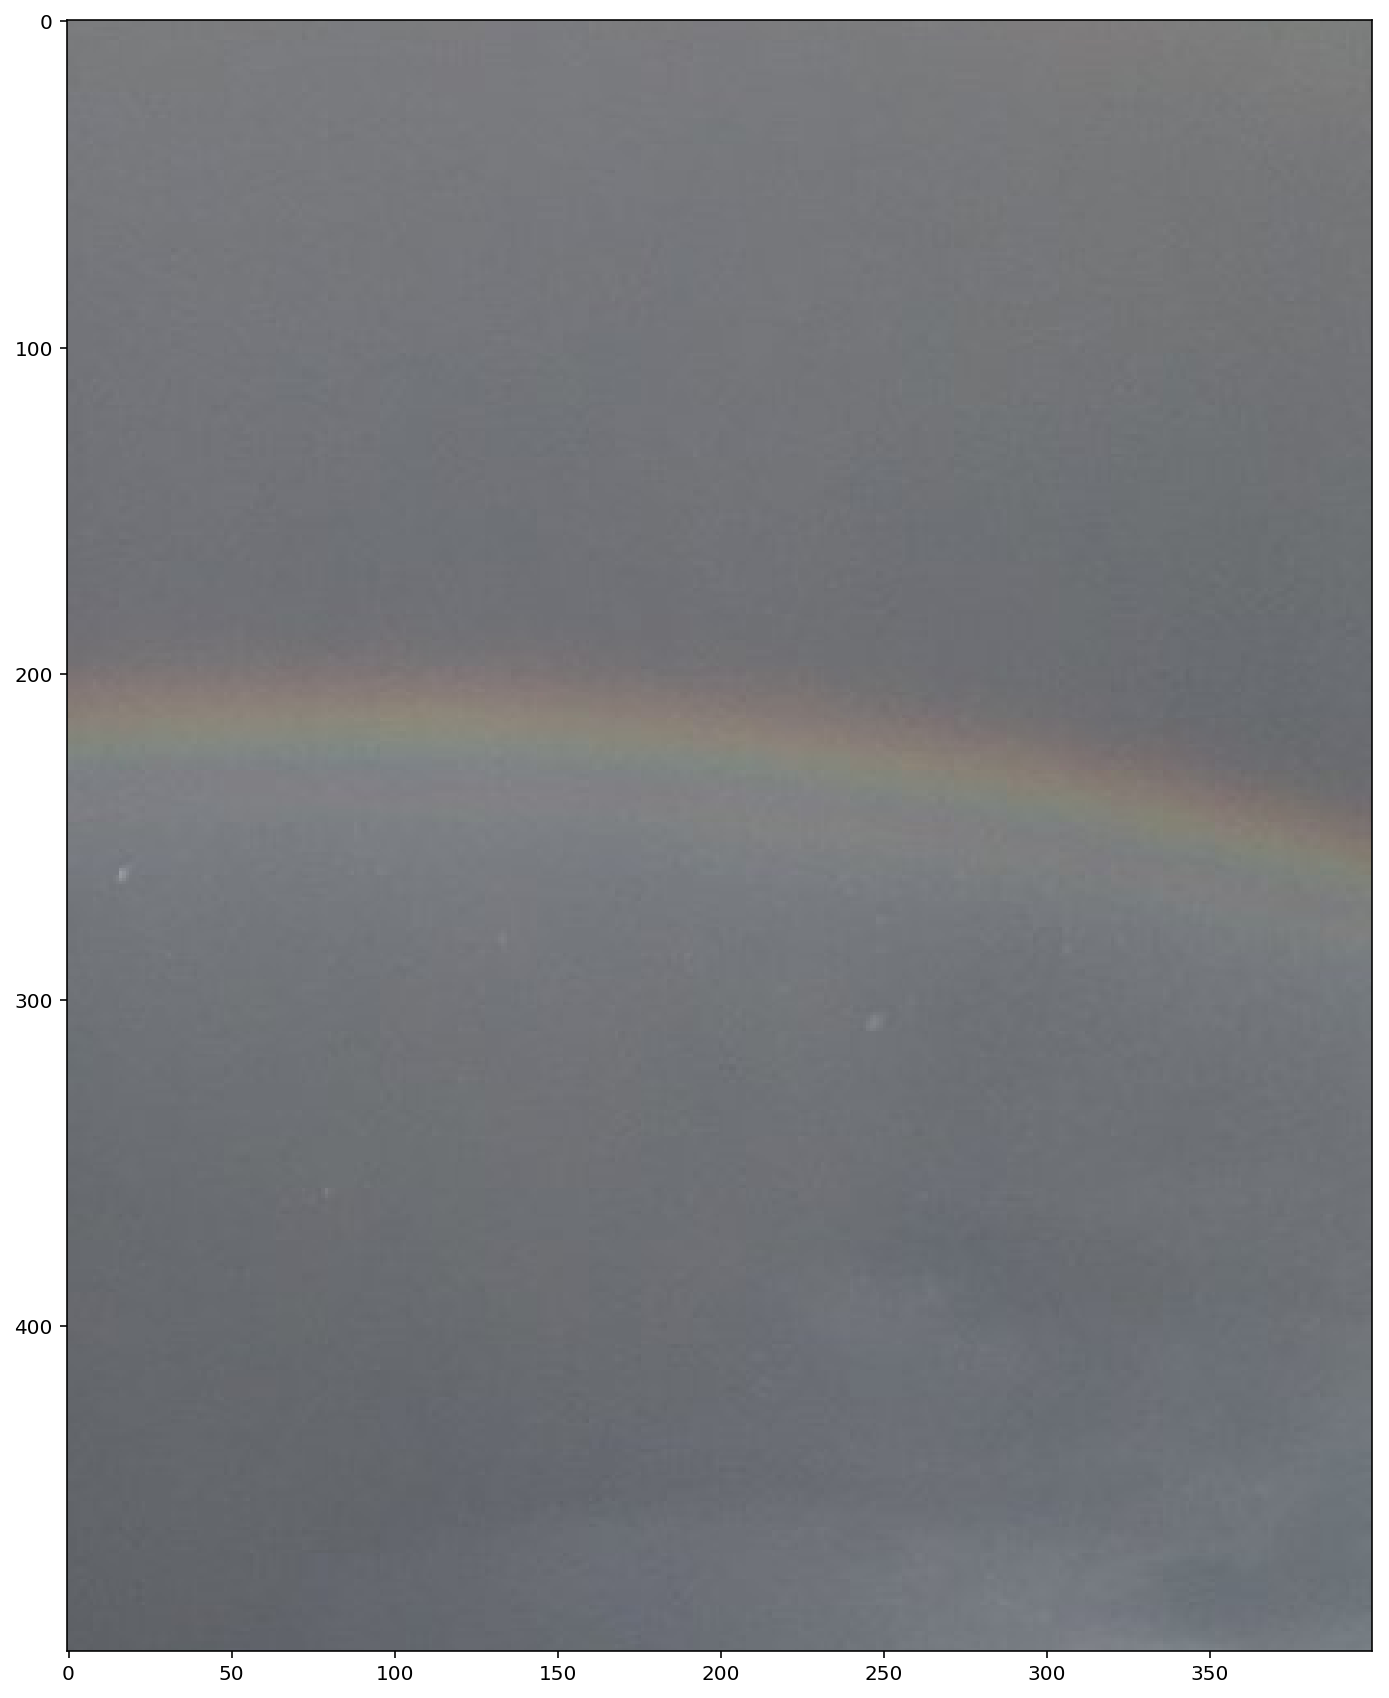

In [14]:
zoom = image[250:750, 0:400]
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
ax.imshow(zoom, vmin=0, vmax=255);

And let's plot the mean grayscale luminance:

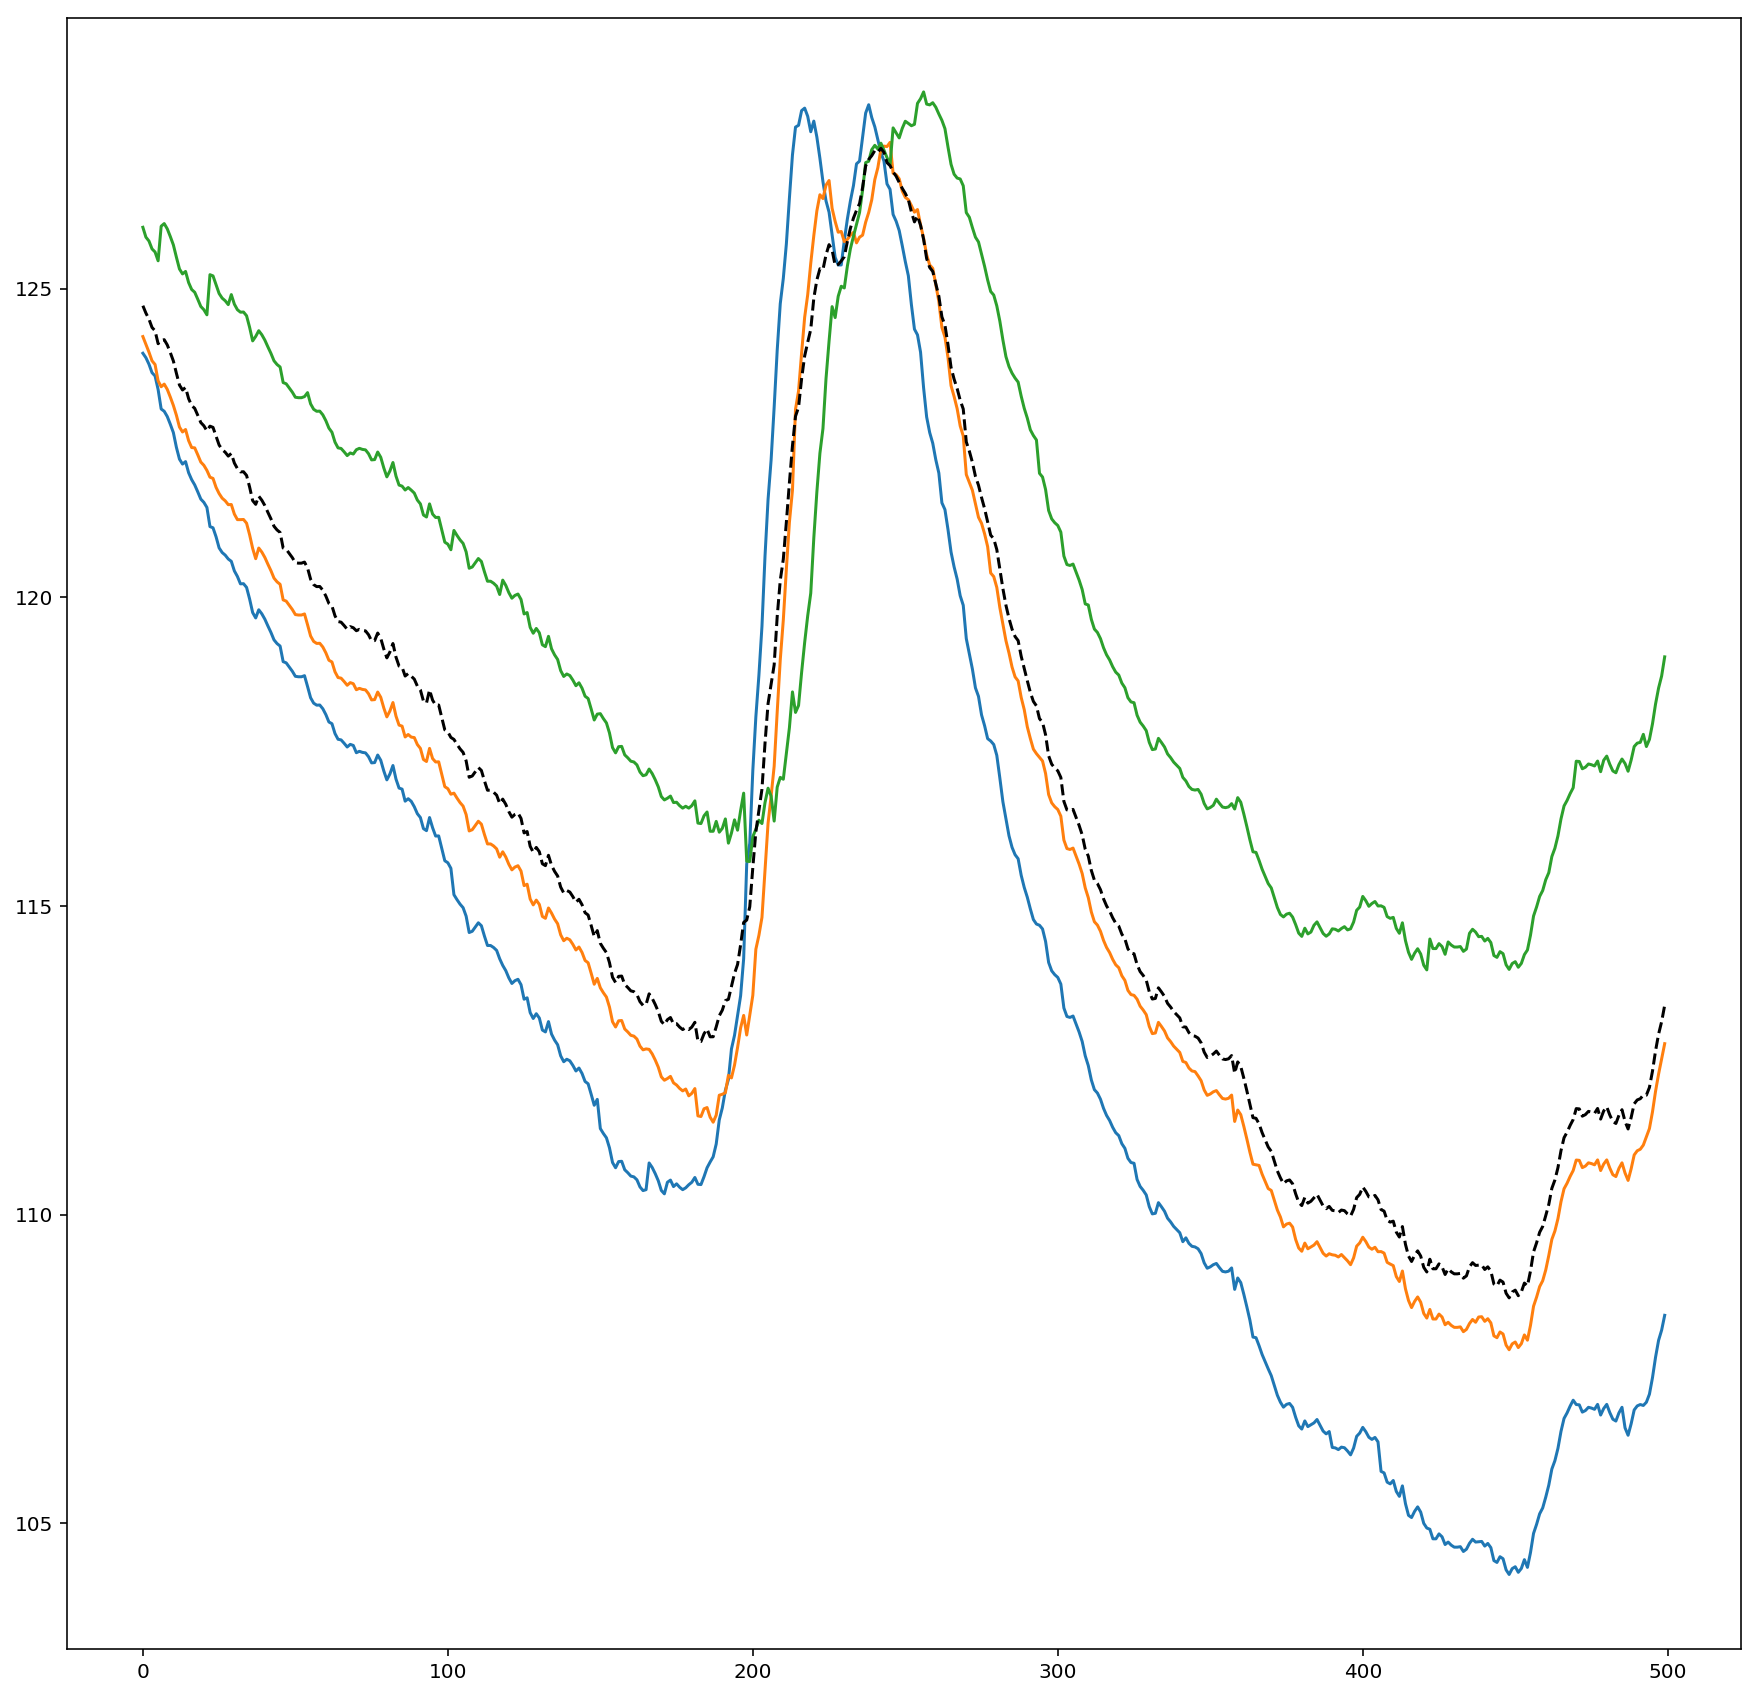

In [15]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(zoom.mean(axis=1))
ax.plot(zoom.mean(axis=(1, 2)), 'k--');

One clearly sees the gradient of the background cloud (mean luminance as a dashed black line), the oscillation of hue in the rainbow (one line per channel), but also an indication that below the rainbow, luminance is quite higher than that predicted by a linear regression don on the upper part of the image.

It is certainly a mixed effect...



## some book keeping for the notebook

In [16]:
%load_ext watermark
%watermark

2018-11-12T12:03:40+01:00

CPython 3.6.5
IPython 7.1.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit


In [17]:
%load_ext version_information
%version_information numpy, matplotlib, imageio

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 7.1.1
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.15.4
matplotlib 3.0.1
imageio 2.4.1
Mon Nov 12 12:03:40 2018 CET